# Homework 1

## Pair Programming Group Number: Group 18
## Members of Team: 
### Fayed Nassor
### Mohamad Minoneshan


### Data maniupuation and Visualization!

In our first assignment you will practice manipuating and visualizing data from a real wold data set, Melbourne Australia home sales records. 

### The Data

Was taken from a Kaggle competition, and came with the following descriptions:
Content & Acknowledgements

```
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

….Now with extra data including including property size, land size and council area, you may need to change your code!

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory
```


## Q1 - Loading Data
Run the following code section to load dataset into a pandas DataFrame named `df`. If you need to look up other
syntax on how to read csv files you can find it [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
# remember to type in your standard library import for pandas first
import pandas as pd

url = 'https://gist.githubusercontent.com/TieJean/ba718aac753c2f90e3d4e040d8f7d982/raw/2aca4164b087fa86721e877b4f1a6bd46d687035/melb_data.csv'

# your code goes here - read the data from the URL 
df = pd.read_csv(url)

In [ ]:
# Displaying the top five rows
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Q2 - How many unique suburbs are there?

Are there any pandas DataFrame operations that can do this for you?

[This](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) function might help. 

In [ ]:
# code goes here
theSuburbs = df['Suburb']
numSuburbs = pd.Series.nunique(theSuburbs)
numSuburbs

314

In [ ]:
# Another approach
df['Suburb'].nunique()

314

## Q3 - How many unique properties are there?

If you forget the names of the columns you can always type:

`df.columns` 

in a cell by itself to see this list of column names.

In [ ]:
# listing the columns
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# code goes here
numProperties = pd.Series.nunique(df['Address'])
numProperties

13378

## Q4 - What is the mean price of a property in the Kensington suburb?

You are getting the hang of reading the documentation!  Try finding the function
for mean yourself at the [root page](https://pandas.pydata.org/pandas-docs/stable/index.html) of the documentation.

In [ ]:
# code goes here
allKensington = df[df['Suburb']=='Kensington']
allKensington['Price'].mean()

831667.4358974359

## Q5 - What percentage of properties contain a YearBuilt value?

In [ ]:
# code goes here
yearBuilt = df[df['YearBuilt'].notnull()]
percentYear = (len(yearBuilt) / len(df)) * 100
percentYear

60.41973490427098

In [ ]:
# Different approach
per = len(df[df['YearBuilt'].notna()]) / len(df) * 100
print(f'{per:.2f}')

60.42


## Q6 - Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph.

Matplotlib is [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) to help. 

In data visualization we discuss the "Ink Ratio" of creating graphics.  If you use the definalt bin sizes of the matplotlib histogram function, you will find that the histogram is not very informative.  Use the documentation to guide you to adjust the width of the bins in the histogram to make one _really_ wide bin on the right, and the rest of the bins equally distributed where most of the data resides. 

(array([1.3576e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0. ,  43301.4,  86602.8, 129904.2, 173205.6, 216507. ,
        259808.4, 303109.8, 346411.2, 389712.6, 433014. ]),
 <a list of 10 Patch objects>)

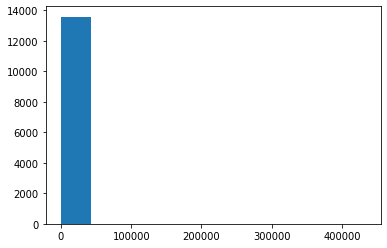

In [ ]:
# code goes here
#initial approach, to see data
import matplotlib.pyplot as plt
df
landSize = df['Landsize']
plt.hist(landSize)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2197aa2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2197aa970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff21979bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2197b3070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2197b3370>],
 'means': []}

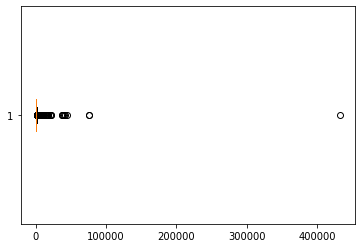

In [ ]:
plt.boxplot(landSize,vert = 0)

In [ ]:
# As we can see from the boxplot, there is an outlier which is larger than 400000!
# So we gonna ignore and scale down our bin range...

(array([4571., 2821., 4383., 1132.,  259.,   83.,   52.,   40.,   42.,
          31.,   14.,   17.,   12.,    6.,    8.,   10.,   10.,   14.,
           8.]),
 array([   0,  250,  500,  750, 1000, 1250, 1500, 1750, 2000, 2250, 2500,
        2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750]),
 <a list of 19 Patch objects>)

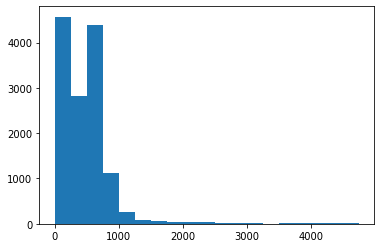

In [ ]:
plt.hist(landSize,bins=range(0, 5000,250))

(array([2248., 1550., 1449., 1167.,  978., 1681., 2026., 1102.,  475.,
         231.,  166.,   68.,   49.,   31.,   28.,   23.,   22.,   19.,
          15.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
 <a list of 19 Patch objects>)

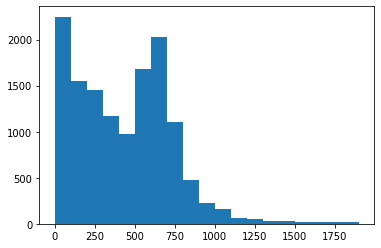

In [ ]:
plt.hist(landSize,bins=range(0, 2000,100))

(array([1969.,  279.,  679.,  871.,  773.,  676.,  689.,  478.,  475.,
         503.,  674., 1007., 1004., 1022.,  676.,  426.,  307.,  168.,
         143.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
        650, 700, 750, 800, 850, 900, 950]),
 <a list of 19 Patch objects>)

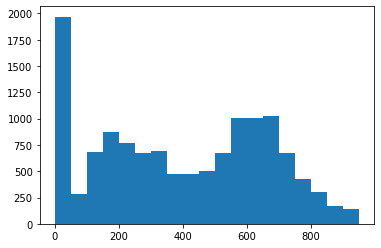

In [ ]:
plt.hist(landSize,bins=range(0, 1000,50))

In [ ]:
# We scaled down tp (0,1000) and (0,2000) which we can observe that the landSize hist is skewed to the right and the majority of lands are less han 1000. 

## Q7 - Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

Break this down into slicing the DataFrame first, then creating the visualization.  There are both `plot` and `scatter` functions in the matplotlib library that can help here.  You'll notice there is more than one way to do a thing so much in computer science 😄

If you have to change your axes and end up excluding some points to make the data more visible, then annotate the number of points excluded in the graph. 

In [ ]:
# reconstructing a new data frame with valid Building Area rows
df_valid_BuilArea = df[df['BuildingArea'].notna()]
# reindexing
df_valid_BuilArea = df_valid_BuilArea.reset_index(drop=True)
df_valid_BuilArea.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [ ]:
len(df_valid_BuilArea)

7130

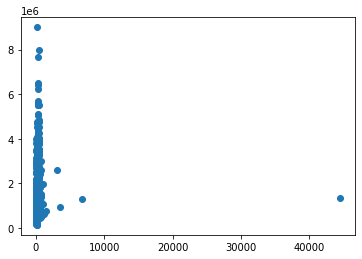

In [ ]:
# code goes here

plt.scatter(df_valid_BuilArea['BuildingArea'],df_valid_BuilArea['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff219390340>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff219390a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff219402fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff21939c100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff21939c400>],
 'means': []}

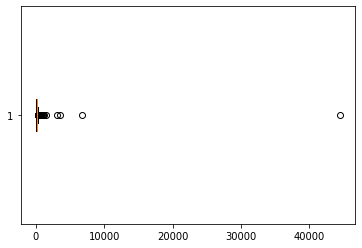

In [ ]:
plt.boxplot(df_valid_BuilArea['BuildingArea'],vert = 0)

In [ ]:
df_valid_BuilArea = df_valid_BuilArea[df_valid_BuilArea['BuildingArea'] < 400]
# reindexing
df_valid_BuilArea = df_valid_BuilArea.reset_index(drop=True)
len(df_valid_BuilArea)

7018

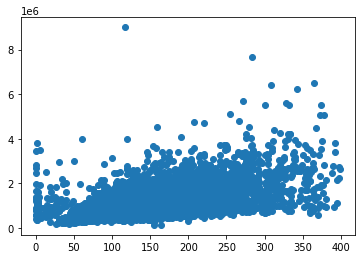

In [ ]:
plt.scatter(df_valid_BuilArea['BuildingArea'],df_valid_BuilArea['Price'])

In [ ]:
# We removed 112 data points to come up with this scsatter plot. 

## Q8 - List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

Check out the function `value_counts` in pandas documentation. 

In [ ]:
# code goes here
per = (df['SellerG'].value_counts().head(10).sum() / df['SellerG'].value_counts().sum() ) * 100
print(f'{per:.2f}')

59.55


## Q9 - Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement
 
Save those DataFrames into the variables `df1` and `df2`.  (We don't use these again, for the next questions just continue using `df`)

Watch out that you don't accidentally change the original DataFrame using a shallow copy.

In [ ]:
# code goes here
# Using a single statement
df1 = df.copy()
df1['Rooms'] = df1['Rooms'] + 1
df1['Rooms']

0        3
1        3
2        4
3        4
4        5
        ..
13575    5
13576    4
13577    4
13578    5
13579    5
Name: Rooms, Length: 13580, dtype: int64

In [ ]:
# Using for loop
df2 = df.copy()
for i in range(len(df)):
  df2['Rooms'][i] += 1
df2['Rooms']

<ipython-input-110-6404ed868236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rooms'][i] += 1


0        3
1        3
2        4
3        4
4        5
        ..
13575    5
13576    4
13577    4
13578    5
13579    5
Name: Rooms, Length: 13580, dtype: int64

## Q10- What is the Address of the earliest built house in the data set?

This will exercise your DataFrame slicing ability. 

In [ ]:
# code goes here
df['YearBuilt'].min()

1196.0

## Q11 - Save a file 

The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the council person.  Export the file with only the allowed columns, and do not write and index column.

The other half of `read_csv`, is `to_csv`.  Make sure you follow the documentation and only include the columns asked for in the output.

In [ ]:
# code goes here
df3 = df[['Suburb','Price','Date']].copy()
df3

,Suburb,Price,Date
0,Abbotsford,1480000.0,3/12/2016
1,Abbotsford,1035000.0,4/02/2016
2,Abbotsford,1465000.0,4/03/2017
3,Abbotsford,850000.0,4/03/2017
4,Abbotsford,1600000.0,4/06/2016
...,...,...,...
13575,Wheelers Hill,1245000.0,26/08/2017
13576,Williamstown,1031000.0,26/08/2017
13577,Williamstown,1170000.0,26/08/2017
13578,Williamstown,2500000.0,26/08/2017


In [ ]:
# double_check
df3.to_csv('Melbourne.csv', index = False)